In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/00 PhD Computação UFPE/2021.2/01 DISCIPLINAS/04 IN1102 - Aprendizagem de Máquina /IN1102 - Aprendizagem de Máquina - compartilhada/Projeto AM 2021.2 - compartilhado com Francisco/Colab"

/content/drive/MyDrive/00 PhD Computação UFPE/2021.2/01 DISCIPLINAS/04 IN1102 - Aprendizagem de Máquina /IN1102 - Aprendizagem de Máquina - compartilhada/Projeto AM 2021.2 - compartilhado com Francisco/Colab


In [3]:
from itertools import chain
import pickle

import numpy as np
import pandas as pd

import src.dataset as dataset

In [4]:
from src.utils import get_fmeasure_modificada
from src.utils import get_hard_patitions_clustering

def obter_classes():
    return dataset.CLASSES_TEST

def calc_partition_coefficient(pertinencia):
    n = pertinencia.shape[0]
    pertinencia = np.power(pertinencia, 2)
    return pertinencia.sum(axis = 1).sum()/n

def calc_modified_partition_coefficient(pertinencia):
    c = pertinencia.shape[1]
    vpc = calc_partition_coefficient(pertinencia)
    return 1 - (c/(c-1))*(1-vpc)

def calc_partition_entropy(pertinencia):
    n = pertinencia.shape[0]
    pertinencia = np.log10(pertinencia) * pertinencia
    return -pertinencia.sum(axis = 1).sum()/n

def importar_resultado(file_name):
    with open(file_name, "rb") as f:
        return pickle.load(f)

In [5]:
melhor_rgb = importar_resultado("data/rgb_test.pickle")
melhor_shape = importar_resultado("data/shape_test.pickle")
melhor_shape_rgb = importar_resultado("data/shape_rgb_test.pickle")

# Melhores resultados:

In [ ]:
print("Melhor custo RGB: ", melhor_rgb["custo"])
print("Melhor custo SHAPE: ", melhor_shape["custo"])
print("Melhor custo SHAPE_RGB: ", melhor_shape_rgb["custo"])

Melhor custo RGB:  -570.1701382278784
Melhor custo SHAPE:  -1216.3679042739454
Melhor custo SHAPE_RGB:  -1216.3679042739454


# Modified partition coefficient


In [ ]:
print("RGB: ", calc_modified_partition_coefficient(melhor_rgb["pertinencia"]))
print("SHAPE: ", calc_modified_partition_coefficient(melhor_shape["pertinencia"]))
print("SHAPE_RGB: ",  calc_modified_partition_coefficient(melhor_shape_rgb["pertinencia"]))

RGB:  0.11664061076377874
SHAPE:  -2.220446049250313e-16
SHAPE_RGB:  -2.220446049250313e-16


# Entropy


In [ ]:
print("RGB: ", calc_partition_entropy(melhor_rgb["pertinencia"]))
print("SHAPE: ", calc_partition_entropy(melhor_shape["pertinencia"]))
print("SHAPE_RGB: ",  calc_partition_entropy(melhor_shape_rgb["pertinencia"]))

RGB:  0.6632022179012137
SHAPE:  0.8450980400142569
SHAPE_RGB:  0.8450980400142569


# Partições Crisp

# Adjusted Rand Index


In [ ]:
classes = obter_classes()

In [ ]:
from sklearn.metrics import adjusted_rand_score, f1_score, accuracy_score

_, rgb_classes = get_hard_patitions_clustering(melhor_rgb["pertinencia"])
_, shape_classes = get_hard_patitions_clustering(melhor_shape["pertinencia"])
_, shape_rgb_classes = get_hard_patitions_clustering(melhor_shape_rgb["pertinencia"])

print('RGB: ', adjusted_rand_score(rgb_classes, classes))
print('SHAPE: ', adjusted_rand_score(shape_classes, classes))
print('SHAPE_RGB: ', adjusted_rand_score(shape_rgb_classes, classes))

RGB:  0.2053801969432299
SHAPE:  0.0007948127000145466
SHAPE_RGB:  0.0006831201351291005


# F-measure adaptada para clusterização


In [ ]:
print('RGB: ', get_fmeasure_modificada(classes, melhor_rgb["pertinencia"]))
print('SHAPE: ', get_fmeasure_modificada(classes, melhor_shape["pertinencia"]))
print('SHAPE_RGB: ', get_fmeasure_modificada(classes, melhor_shape_rgb["pertinencia"]))

RGB:  0.40984832450065617
SHAPE:  0.24886377594890063
SHAPE_RGB:  0.24846340100577388


# Comparação dois a dois

In [ ]:
grupos2a2 = [
          ("RGB x SHAPE", melhor_rgb, melhor_shape),
          ("SHAPE X RGB", melhor_shape, melhor_rgb),
          ("RGB X SHAPE_RGB", melhor_rgb, melhor_shape_rgb),
          ("SHAPE_RGB X RGB", melhor_shape_rgb, melhor_rgb),
          ("SHAPE X SHAPE_RGB", melhor_shape, melhor_shape_rgb),
          ("SHAPE_RGB X SHAPE", melhor_shape_rgb, melhor_shape),
]

## Índice rand corrigido

In [ ]:
for name, dt1, dt2 in grupos2a2:
  _,y1 = get_hard_patitions_clustering(dt1["pertinencia"])
  _,y2 = get_hard_patitions_clustering(dt2["pertinencia"])

  print(f'{name}: ', adjusted_rand_score(y1, y2))

RGB x SHAPE:  0.0021261052574304577
SHAPE X RGB:  0.0021261052574304577
RGB X SHAPE_RGB:  0.003666017961135251
SHAPE_RGB X RGB:  0.003666017961135251
SHAPE X SHAPE_RGB:  0.8438714967004756
SHAPE_RGB X SHAPE:  0.8438714967004756


# Medida-F

In [ ]:
for name, dt1, dt2 in grupos2a2:
  _,y1 = get_hard_patitions_clustering(dt1["pertinencia"])
  _,y2 = get_hard_patitions_clustering(dt2["pertinencia"])

  print(f'{name}: ', f1_score(y1, y2, average="weighted"))

RGB x SHAPE:  0.15374338513312988
SHAPE X RGB:  0.4624470910573463
RGB X SHAPE_RGB:  0.1547394889237391
SHAPE_RGB X RGB:  0.4576414634572132
SHAPE X SHAPE_RGB:  0.9640582851466883
SHAPE_RGB X SHAPE:  0.947370286281883


# Imprimindo resultados

## Protótipos

In [ ]:
def imprimir_prototipos(protos):
  for i, p in enumerate(protos, start=1):
    print(i, ":", p)
  
print("RGB: ")
imprimir_prototipos(melhor_rgb["prototipos"])

print("SHAPE: ")
imprimir_prototipos(melhor_shape["prototipos"])

print("SHAPE_RGB: ")
imprimir_prototipos(melhor_shape_rgb["prototipos"])

RGB: 
1 : [-0.21265413 -0.26721767 -0.28112453 -0.19917013  0.33268862 -0.44017467
  0.45161291 -0.22129433  0.32397117  0.68034861]
2 : [-0.205377   -0.25344355 -0.27309239 -0.1964039   0.32495166 -0.42969432
  0.44354838 -0.21503129  0.30207625  0.67793947]
3 : [-0.205377   -0.25344355 -0.27309239 -0.1964039   0.32495166 -0.42969432
  0.44354838 -0.21503129  0.30207625  0.67793947]
4 : [-0.205377   -0.25344355 -0.27309239 -0.1964039   0.32495166 -0.42969432
  0.44354838 -0.21503129  0.30207625  0.67793947]
5 : [ 0.62421672  0.63911841  0.62449795  0.58644536 -0.45647974  0.45414848
 -0.26612906  0.63256784 -0.29150925 -0.10444222]
6 : [ 0.69617954  0.68870519  0.67670677  0.65006919 -0.47969062  0.52751091
 -0.40322577  0.68684757 -0.31735511 -0.01903872]
7 : [ 0.62421672  0.63911841  0.62449795  0.58644536 -0.45647974  0.45414848
 -0.26612906  0.63256784 -0.29150925 -0.10444222]
SHAPE: 
1 : [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.42981696e-08
 -5.80644610e-08 -4.60995953

## Relevância das variáveis
  

In [ ]:
def imprimir_relevancias(relevancias):
  for i, r in enumerate(relevancias, start=1):
    print(i, ":", r)

In [ ]:
print("RGB: ")
imprimir_relevancias(melhor_rgb["relevancia"])

print("SHAPE: ")
imprimir_relevancias(melhor_shape["relevancia"])

print("SHAPE_RGB: ")
imprimir_relevancias(melhor_shape_rgb["relevancia"])

RGB: 
1 : [2.19190497e-004 5.78655420e-005 9.99722868e-001 1.24685394e-017
 1.74604353e-070 2.42092816e-046 4.49355768e-171 7.63135182e-008
 4.75260886e-189 0.00000000e+000]
2 : [4.97512479e-004 6.66942682e-005 9.99435562e-001 5.82119690e-017
 3.06450453e-070 6.23255132e-047 1.40404173e-172 2.31424397e-007
 2.66084115e-185 0.00000000e+000]
3 : [4.97512479e-004 6.66942682e-005 9.99435562e-001 5.82119690e-017
 3.06450453e-070 6.23255132e-047 1.40404173e-172 2.31424397e-007
 2.66084115e-185 0.00000000e+000]
4 : [4.97512479e-004 6.66942682e-005 9.99435562e-001 5.82119690e-017
 3.06450453e-070 6.23255132e-047 1.40404173e-172 2.31424397e-007
 2.66084115e-185 0.00000000e+000]
5 : [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 1.63629520e-123 1.45764962e-121 0.00000000e+000
 2.23016395e-199 1.00000000e+000]
6 : [7.97876073e-204 1.00514789e-207 7.42177562e-193 2.32068094e-227
 5.53069813e-231 1.26508514e-123 6.82253495e-139 5.47546093e-200
 1.00000000e+000 0.0

## Matriz de confusão crisp x à priori

### RGB

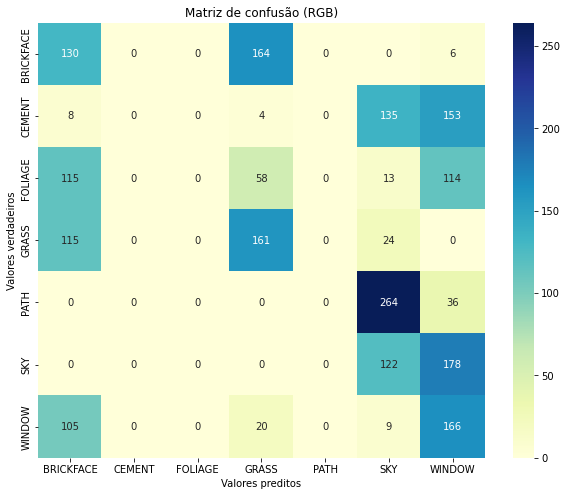

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_matriz(resultado, name):
  class_names = dataset.le_test.classes_

  y_pred =  get_hard_patitions_clustering(resultado["pertinencia"])[1]

  cm = confusion_matrix(classes, y_pred)
  cm_df = pd.DataFrame(cm,
                      index = class_names, 
                      columns = class_names)

  plt.figure(figsize=(10,8))
  sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlGnBu")
  plt.title(f'Matriz de confusão ({name})')
  plt.ylabel('Valores verdadeiros')
  plt.xlabel('Valores preditos')
  plt.show()


plot_matriz(melhor_rgb, "RGB")


### SHAPE

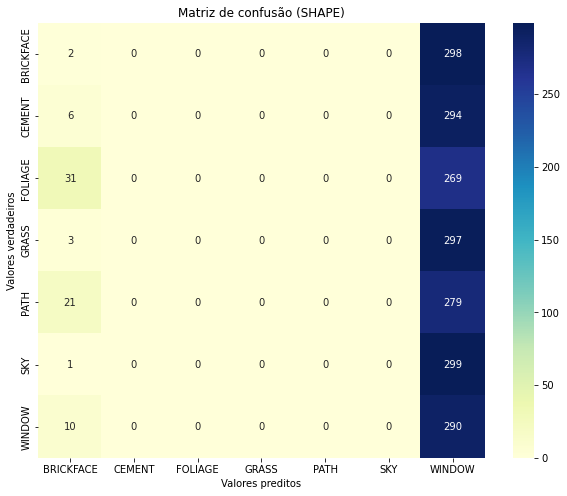

In [ ]:
plot_matriz(melhor_shape, "SHAPE")

### SHAPE_RGB

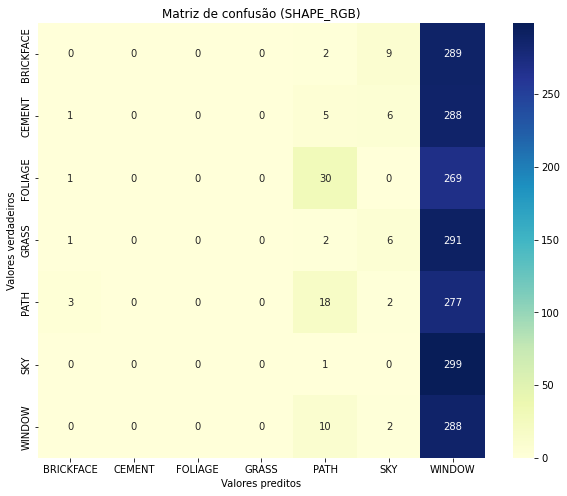

In [ ]:
plot_matriz(melhor_shape_rgb, "SHAPE_RGB")

## Matriz de confusão crisp x crisp

### RGB x SHAPE

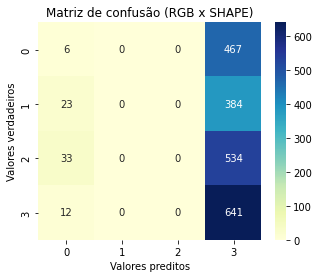

In [ ]:
def plot_matriz_crisp_x_crisp(dt1, dt2, name):
  y_true =  get_hard_patitions_clustering(dt1["pertinencia"])[1]
  y_pred =  get_hard_patitions_clustering(dt2["pertinencia"])[1]
  

  cm = confusion_matrix(y_true, y_pred)
  cm_df = pd.DataFrame(cm)

  plt.figure(figsize=(5,4))
  sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlGnBu")
  plt.title(f'Matriz de confusão ({name})')
  plt.ylabel('Valores verdadeiros')
  plt.xlabel('Valores preditos')
  plt.show()

plot_matriz_crisp_x_crisp(melhor_rgb, melhor_shape, "RGB x SHAPE")

### SHAPE x RGB

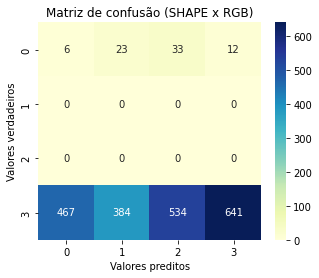

In [ ]:
plot_matriz_crisp_x_crisp(melhor_shape, melhor_rgb, "SHAPE x RGB")

### RGB x RGB_SHAPE

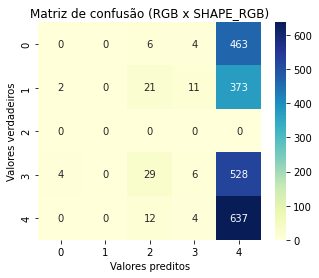

In [ ]:
plot_matriz_crisp_x_crisp(melhor_rgb, melhor_shape_rgb, "RGB x SHAPE_RGB")

### SHAPE_RGB x RGB

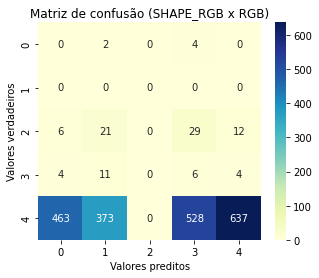

In [ ]:
plot_matriz_crisp_x_crisp(melhor_shape_rgb, melhor_rgb, "SHAPE_RGB x RGB")

### SHAPE X SHAPE_RGB

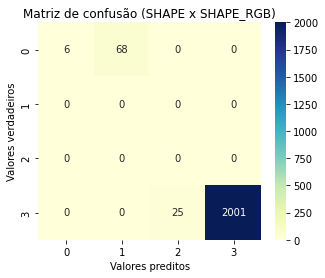

In [ ]:
plot_matriz_crisp_x_crisp(melhor_shape, melhor_shape_rgb, "SHAPE x SHAPE_RGB")

### SHAPE_RGB x SHAPE

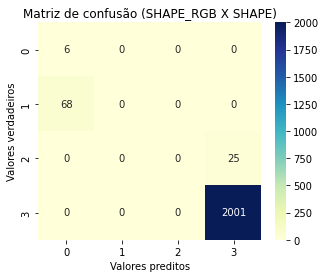

In [ ]:
plot_matriz_crisp_x_crisp(melhor_shape_rgb, melhor_shape, "SHAPE_RGB X SHAPE")